In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv("Ecommerce Purchases")

In [3]:
data.head()

,Address,Lot,AM or PM,Browser Info,Company,Credit Card,CC Exp Date,CC Security Code,CC Provider,Email,Job,IP Address,Language,Purchase Price
0,"16629 Pace Camp Apt. 448\nAlexisborough, NE 77...",46 in,PM,Opera/9.56.(X11; Linux x86_64; sl-SI) Presto/2...,Martinez-Herman,6011929061123406,02/20,900,JCB 16 digit,pdunlap@yahoo.com,"Scientist, product/process development",149.146.147.205,el,98.14
1,"9374 Jasmine Spurs Suite 508\nSouth John, TN 8...",28 rn,PM,Opera/8.93.(Windows 98; Win 9x 4.90; en-US) Pr...,"Fletcher, Richards and Whitaker",3337758169645356,11/18,561,Mastercard,anthony41@reed.com,Drilling engineer,15.160.41.51,fr,70.73
2,Unit 0065 Box 5052\nDPO AP 27450,94 vE,PM,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,"Simpson, Williams and Pham",675957666125,08/19,699,JCB 16 digit,amymiller@morales-harrison.com,Customer service manager,132.207.160.22,de,0.95
3,"7780 Julia Fords\nNew Stacy, WA 45798",36 vm,PM,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_0 ...,"Williams, Marshall and Buchanan",6011578504430710,02/24,384,Discover,brent16@olson-robinson.info,Drilling engineer,30.250.74.19,es,78.04
4,"23012 Munoz Drive Suite 337\nNew Cynthia, TX 5...",20 IE,AM,Opera/9.58.(X11; Linux x86_64; it-IT) Presto/2...,"Brown, Watson and Andrews",6011456623207998,10/25,678,Diners Club / Carte Blanche,christopherwright@gmail.com,Fine artist,24.140.33.94,es,77.82


In [4]:
data.shape

(10000, 14)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Address           10000 non-null  object 
 1   Lot               10000 non-null  object 
 2   AM or PM          10000 non-null  object 
 3   Browser Info      10000 non-null  object 
 4   Company           10000 non-null  object 
 5   Credit Card       10000 non-null  int64  
 6   CC Exp Date       10000 non-null  object 
 7   CC Security Code  10000 non-null  int64  
 8   CC Provider       10000 non-null  object 
 9   Email             10000 non-null  object 
 10  Job               10000 non-null  object 
 11  IP Address        10000 non-null  object 
 12  Language          10000 non-null  object 
 13  Purchase Price    10000 non-null  float64
dtypes: float64(1), int64(2), object(11)
memory usage: 1.1+ MB


In [6]:
data.describe()

,Credit Card,CC Security Code,Purchase Price
count,1.000000e+04,10000.000000,10000.000000
mean,2.341374e+15,907.217800,50.347302
std,2.256103e+15,1589.693035,29.015836
min,6.040186e+10,0.000000,0.000000
25%,3.056322e+13,280.000000,25.150000
50%,8.699942e+14,548.000000,50.505000
75%,4.492298e+15,816.000000,75.770000
max,6.012000e+15,9993.000000,99.990000


In [7]:
data.isnull().sum()

Address             0
Lot                 0
AM or PM            0
Browser Info        0
Company             0
Credit Card         0
CC Exp Date         0
CC Security Code    0
CC Provider         0
Email               0
Job                 0
IP Address          0
Language            0
Purchase Price      0
dtype: int64

In [8]:
data.columns

Index(['Address', 'Lot', 'AM or PM', 'Browser Info', 'Company', 'Credit Card',
       'CC Exp Date', 'CC Security Code', 'CC Provider', 'Email', 'Job',
       'IP Address', 'Language', 'Purchase Price'],
      dtype='object')

In [9]:
data["Purchase Price"].min()

0.0

In [10]:
data["Purchase Price"].max()

99.99

In [11]:
data["Purchase Price"].mean()

50.347302

In [12]:
data["Language"].value_counts()

de    1155
ru    1155
el    1137
pt    1118
en    1098
fr    1097
es    1095
it    1086
zh    1059
Name: Language, dtype: int64

In [13]:
len(data[data["Language"] == "en"])

1098

In [14]:
data["Job"].value_counts()

Interior and spatial designer    31
Lawyer                           30
Social researcher                28
Purchasing manager               27
Designer, jewellery              27
                                 ..
Prison officer                    7
Editor, film/video                6
Actuary                           6
Information systems manager       5
Investment analyst                5
Name: Job, Length: 623, dtype: int64

#### lets fetech the job coloumn where the job type is Analyst

In [15]:
data[data["Job"].str.contains("analyst")]

,Address,Lot,AM or PM,Browser Info,Company,Credit Card,CC Exp Date,CC Security Code,CC Provider,Email,Job,IP Address,Language,Purchase Price
102,"5977 Taylor Club\nSouth Sharon, OR 08384",95 Fi,PM,Mozilla/5.0 (Windows NT 6.1; it-IT; rv:1.9.0.2...,"Bradley, Cordova and Howell",6011922232822485,12/16,654,VISA 16 digit,hmurphy@yahoo.com,Intelligence analyst,241.61.121.136,ru,91.67
113,"044 Kimberly Vista\nEast Jeremiahborough, PW 8...",76 UK,PM,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_6 ...,Webb-Landry,5139494321155176,06/20,7237,Mastercard,christophersmith@hotmail.com,Intelligence analyst,222.175.0.83,es,11.21
362,USNS Ward\nFPO AA 60679-9769,62 Dy,PM,Mozilla/5.0 (X11; Linux i686) AppleWebKit/5332...,"Beltran, Conner and Glover",3096625884877930,05/25,894,Voyager,vwilcox@valenzuela.com,Systems analyst,232.254.194.40,zh,72.82
444,"398 Brandy Orchard\nDavidsonburgh, VA 31695",16 fI,AM,Mozilla/5.0 (Windows NT 6.1; sl-SI; rv:1.9.1.2...,Bruce-Cook,4288316503652,07/26,514,Mastercard,djackson@hotmail.com,Risk analyst,116.63.101.91,zh,1.42
452,"12773 Jessica Trace\nHarmonborough, GA 69493-9134",77 lY,AM,Mozilla/5.0 (Macintosh; U; PPC Mac OS X 10_8_1...,Foley-Byrd,4431981034237,03/20,326,VISA 16 digit,david21@lopez.com,Intelligence analyst,100.71.205.133,ru,42.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9318,"5383 Douglas Landing Apt. 476\nStoutton, AZ 04...",44 BF,PM,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Gordon-Jacobs,6011701376208796,06/25,726,JCB 16 digit,vfoster@yahoo.com,Systems analyst,201.71.245.46,zh,21.01
9397,"9388 Desiree Trafficway Apt. 176\nSouth Laura,...",99 aL,AM,Mozilla/5.0 (iPod; U; CPU iPhone OS 3_2 like M...,Hunter-Smith,30211357189395,10/16,9595,JCB 15 digit,edavis@avery-turner.com,Systems analyst,113.243.124.247,es,77.22
9413,"7761 Steven Junction Apt. 403\nCampbellside, U...",71 AM,PM,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,"Moore, Cook and Bailey",4927805731556746,01/17,352,Diners Club / Carte Blanche,gerald72@yahoo.com,Financial risk analyst,233.151.80.221,en,86.65
9525,"PSC 8080, Box 8270\nAPO AE 26014",31 Ol,PM,Mozilla/5.0 (X11; Linux i686) AppleWebKit/5312...,"Hicks, Russell and Conley",6011160207837184,10/25,994,VISA 16 digit,xfernandez@yahoo.com,Intelligence analyst,142.169.151.131,el,90.14


### lets find the the email of this IP Address 113.243.124.247

In [16]:
data[data["IP Address"] =="113.243.124.247"]["Email"]

9397    edavis@avery-turner.com
Name: Email, dtype: object

### how many people have mastercard and their purchase is greater than 50

In [17]:
data[(data["CC Provider"] == a"Mastercard") & (data["Purchase Price"]>50)]

,Address,Lot,AM or PM,Browser Info,Company,Credit Card,CC Exp Date,CC Security Code,CC Provider,Email,Job,IP Address,Language,Purchase Price
1,"9374 Jasmine Spurs Suite 508\nSouth John, TN 8...",28 rn,PM,Opera/8.93.(Windows 98; Win 9x 4.90; en-US) Pr...,"Fletcher, Richards and Whitaker",3337758169645356,11/18,561,Mastercard,anthony41@reed.com,Drilling engineer,15.160.41.51,fr,70.73
18,"461 Christopher Square\nWest Michaelchester, C...",17 SB,PM,Mozilla/5.0 (X11; Linux i686; rv:1.9.6.20) Gec...,"Beard, Abbott and Pena",6011350184276270,12/22,767,Mastercard,hannah63@yahoo.com,Photographer,73.250.176.201,el,70.15
31,USNS Alvarado\nFPO AA 27052-1231,26 Lh,PM,Opera/8.84.(X11; Linux i686; sl-SI) Presto/2.9...,Nicholson Group,4614997834548,03/22,909,Mastercard,ashley12@hotmail.com,Sales executive,94.176.142.201,en,94.14
35,"93392 Webb Gardens Apt. 220\nLaurabury, AR 999...",37 om,AM,Mozilla/5.0 (Macintosh; U; Intel Mac OS X 10_7...,Mora Ltd,6011049630969815,09/16,367,Mastercard,hgonzalez@mcdowell.com,"Lecturer, further education",216.23.95.40,zh,97.46
90,"431 Bowen Lights\nFergusonborough, MH 01362",31 tG,AM,Mozilla/5.0 (Windows NT 5.2; it-IT; rv:1.9.1.2...,Copeland-Lee,639032576097,06/18,868,Mastercard,nrogers@brown.com,"Teacher, English as a foreign language",153.188.13.203,es,78.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9941,"43757 Brown Lodge\nValerieberg, PR 88518",68 DG,AM,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,"Jones, Williams and Dunn",6011508474487291,04/26,906,Mastercard,christian55@gmail.com,Secondary school teacher,216.118.235.145,fr,60.03
9948,"95544 Johnson Isle Suite 939\nMichaelberg, RI ...",91 bW,AM,Opera/8.36.(X11; Linux x86_64; sl-SI) Presto/2...,Fox-Peterson,4762924304307,03/17,567,Mastercard,haleybenjamin@gmail.com,Structural engineer,120.36.140.58,en,71.89
9954,"051 Samantha Wells Apt. 328\nScottborough, OR ...",11 vG,AM,Mozilla/5.0 (Macintosh; U; PPC Mac OS X 10_8_2...,"Mendoza, Zimmerman and Reilly",30232295374907,05/21,762,Mastercard,brownamy@perkins.com,"Presenter, broadcasting",61.97.84.101,it,87.15
9981,"087 Larson Roads Apt. 587\nRicestad, WI 98077-...",95 Kw,AM,Opera/9.63.(Windows NT 5.01; en-US) Presto/2.9...,"Ortiz, Schultz and Adams",4690863684605,01/19,695,Mastercard,laurenbennett@richards.com,Environmental education officer,106.21.237.73,pt,63.61


In [18]:
data["AM or PM"].value_counts()

PM    5068
AM    4932
Name: AM or PM, dtype: int64

<AxesSubplot:>

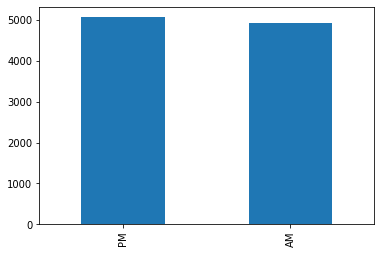

In [19]:
# how many people purchase during am and pm
data["AM or PM"].value_counts().plot(kind="bar")

### Fetch 2020 year from the CC exp Date col

In [20]:
def fun():
    exp = 0
    for i in data["CC Exp Date"]:
        if i.split("/")[1] == "20":
            exp = exp+1
    print(exp)

In [21]:
fun()

988


<!-- ## lambda function -->
data[data["CC Exp Date"].apply(lambda x: x[3:]=="20")]

In [23]:
# top 5 email providers
list = []
for i in data["Email"]:
    list.append(i.split("@")[1])

In [24]:
data["temp"] = list

In [25]:
data.head(3)

,Address,Lot,AM or PM,Browser Info,Company,Credit Card,CC Exp Date,CC Security Code,CC Provider,Email,Job,IP Address,Language,Purchase Price,temp
0,"16629 Pace Camp Apt. 448\nAlexisborough, NE 77...",46 in,PM,Opera/9.56.(X11; Linux x86_64; sl-SI) Presto/2...,Martinez-Herman,6011929061123406,02/20,900,JCB 16 digit,pdunlap@yahoo.com,"Scientist, product/process development",149.146.147.205,el,98.14,yahoo.com
1,"9374 Jasmine Spurs Suite 508\nSouth John, TN 8...",28 rn,PM,Opera/8.93.(Windows 98; Win 9x 4.90; en-US) Pr...,"Fletcher, Richards and Whitaker",3337758169645356,11/18,561,Mastercard,anthony41@reed.com,Drilling engineer,15.160.41.51,fr,70.73,reed.com
2,Unit 0065 Box 5052\nDPO AP 27450,94 vE,PM,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,"Simpson, Williams and Pham",675957666125,08/19,699,JCB 16 digit,amymiller@morales-harrison.com,Customer service manager,132.207.160.22,de,0.95,morales-harrison.com


In [26]:
data["temp"].value_counts().head()

hotmail.com     1638
yahoo.com       1616
gmail.com       1605
smith.com         42
williams.com      37
Name: temp, dtype: int64

In [27]:
# using lambda function
data["Email"].apply(lambda x: x.split("@")[1]).value_counts().head()

hotmail.com     1638
yahoo.com       1616
gmail.com       1605
smith.com         42
williams.com      37
Name: Email, dtype: int64

In [28]:
data.head(2)

,Address,Lot,AM or PM,Browser Info,Company,Credit Card,CC Exp Date,CC Security Code,CC Provider,Email,Job,IP Address,Language,Purchase Price,temp
0,"16629 Pace Camp Apt. 448\nAlexisborough, NE 77...",46 in,PM,Opera/9.56.(X11; Linux x86_64; sl-SI) Presto/2...,Martinez-Herman,6011929061123406,02/20,900,JCB 16 digit,pdunlap@yahoo.com,"Scientist, product/process development",149.146.147.205,el,98.14,yahoo.com
1,"9374 Jasmine Spurs Suite 508\nSouth John, TN 8...",28 rn,PM,Opera/8.93.(Windows 98; Win 9x 4.90; en-US) Pr...,"Fletcher, Richards and Whitaker",3337758169645356,11/18,561,Mastercard,anthony41@reed.com,Drilling engineer,15.160.41.51,fr,70.73,reed.com


### fetch month and year from the CC exp Date colum and create new one

In [29]:
data["CC Exp Month"] = data["CC Exp Date"].apply(lambda x: x.split("/")[0])
data["CC Exp Year"] = data["CC Exp Date"].apply(lambda x: x.split("/")[1])

In [30]:
data.head(2)

,Address,Lot,AM or PM,Browser Info,Company,Credit Card,CC Exp Date,CC Security Code,CC Provider,Email,Job,IP Address,Language,Purchase Price,temp,CC Exp Month,CC Exp Year
0,"16629 Pace Camp Apt. 448\nAlexisborough, NE 77...",46 in,PM,Opera/9.56.(X11; Linux x86_64; sl-SI) Presto/2...,Martinez-Herman,6011929061123406,02/20,900,JCB 16 digit,pdunlap@yahoo.com,"Scientist, product/process development",149.146.147.205,el,98.14,yahoo.com,02,20
1,"9374 Jasmine Spurs Suite 508\nSouth John, TN 8...",28 rn,PM,Opera/8.93.(Windows 98; Win 9x 4.90; en-US) Pr...,"Fletcher, Richards and Whitaker",3337758169645356,11/18,561,Mastercard,anthony41@reed.com,Drilling engineer,15.160.41.51,fr,70.73,reed.com,11,18


In [31]:
data["Browser"] = data["Browser Info"].apply(lambda x: x.split("/")[0])

In [32]:
data.head(2)

,Address,Lot,AM or PM,Browser Info,Company,Credit Card,CC Exp Date,CC Security Code,CC Provider,Email,Job,IP Address,Language,Purchase Price,temp,CC Exp Month,CC Exp Year,Browser
0,"16629 Pace Camp Apt. 448\nAlexisborough, NE 77...",46 in,PM,Opera/9.56.(X11; Linux x86_64; sl-SI) Presto/2...,Martinez-Herman,6011929061123406,02/20,900,JCB 16 digit,pdunlap@yahoo.com,"Scientist, product/process development",149.146.147.205,el,98.14,yahoo.com,02,20,Opera
1,"9374 Jasmine Spurs Suite 508\nSouth John, TN 8...",28 rn,PM,Opera/8.93.(Windows 98; Win 9x 4.90; en-US) Pr...,"Fletcher, Richards and Whitaker",3337758169645356,11/18,561,Mastercard,anthony41@reed.com,Drilling engineer,15.160.41.51,fr,70.73,reed.com,11,18,Opera


In [33]:
data["new_lot"] = data["Lot"].apply(lambda x:x.split(" ")[0])

In [34]:
data.head(2)

,Address,Lot,AM or PM,Browser Info,Company,Credit Card,CC Exp Date,CC Security Code,CC Provider,Email,Job,IP Address,Language,Purchase Price,temp,CC Exp Month,CC Exp Year,Browser,new_lot
0,"16629 Pace Camp Apt. 448\nAlexisborough, NE 77...",46 in,PM,Opera/9.56.(X11; Linux x86_64; sl-SI) Presto/2...,Martinez-Herman,6011929061123406,02/20,900,JCB 16 digit,pdunlap@yahoo.com,"Scientist, product/process development",149.146.147.205,el,98.14,yahoo.com,02,20,Opera,46
1,"9374 Jasmine Spurs Suite 508\nSouth John, TN 8...",28 rn,PM,Opera/8.93.(Windows 98; Win 9x 4.90; en-US) Pr...,"Fletcher, Richards and Whitaker",3337758169645356,11/18,561,Mastercard,anthony41@reed.com,Drilling engineer,15.160.41.51,fr,70.73,reed.com,11,18,Opera,28


### drop unnecessary col

In [35]:
data.drop(["Address", "Lot", "Browser Info", "Company","CC Exp Date", "Email", "Job"], axis=1, inplace=True)

In [36]:
data["CC Provider"] = data["CC Provider"].apply(lambda x:x.split(" ")[0])

In [37]:
data["CC Provider"].value_counts()

JCB           2584
VISA          2492
American       849
Maestro        846
Voyager        829
Discover       817
Mastercard     816
Diners         767
Name: CC Provider, dtype: int64

In [38]:
data.head(3)

,AM or PM,Credit Card,CC Security Code,CC Provider,IP Address,Language,Purchase Price,temp,CC Exp Month,CC Exp Year,Browser,new_lot
0,PM,6011929061123406,900,JCB,149.146.147.205,el,98.14,yahoo.com,02,20,Opera,46
1,PM,3337758169645356,561,Mastercard,15.160.41.51,fr,70.73,reed.com,11,18,Opera,28
2,PM,675957666125,699,JCB,132.207.160.22,de,0.95,morales-harrison.com,08,19,Mozilla,94


### doing some data visualization

In [39]:
data["CC Provider"].value_counts()

JCB           2584
VISA          2492
American       849
Maestro        846
Voyager        829
Discover       817
Mastercard     816
Diners         767
Name: CC Provider, dtype: int64

<AxesSubplot:xlabel='CC Provider', ylabel='count'>

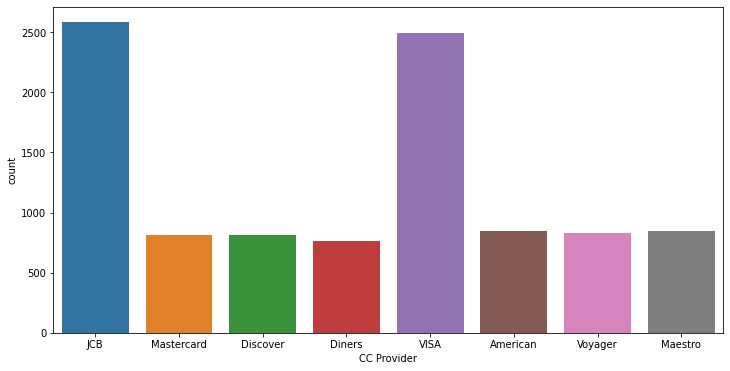

In [40]:
plt.figure(figsize=(12, 6))
sns.countplot(x="CC Provider", data=data)

In [41]:
data["AM or PM"].value_counts()

PM    5068
AM    4932
Name: AM or PM, dtype: int64

<AxesSubplot:xlabel='AM or PM', ylabel='count'>

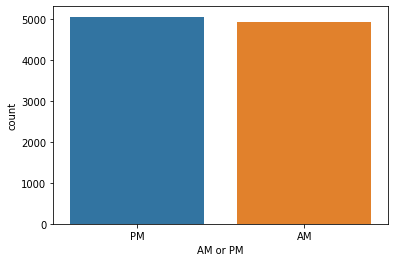

In [42]:
sns.countplot(x="AM or PM", data=data)

In [43]:
data["temp"].value_counts()

hotmail.com            1638
yahoo.com              1616
gmail.com              1605
smith.com                42
williams.com             37
                       ... 
booker.com                1
woods-allen.biz           1
richards-wilson.com       1
morris-thomas.com         1
wade-garner.com           1
Name: temp, Length: 3416, dtype: int64

In [44]:
data["Language"].value_counts()

de    1155
ru    1155
el    1137
pt    1118
en    1098
fr    1097
es    1095
it    1086
zh    1059
Name: Language, dtype: int64

<AxesSubplot:xlabel='Language', ylabel='count'>

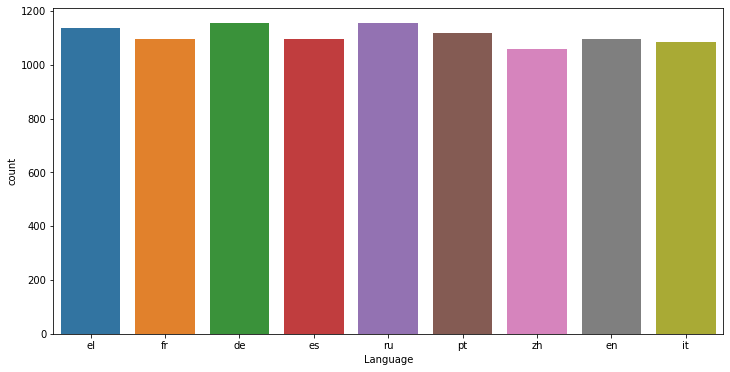

In [45]:
plt.figure(figsize=(12, 6))
sns.countplot(x="Language", data=data)

In [46]:
data["Browser"].value_counts()

Mozilla    7924
Opera      2076
Name: Browser, dtype: int64

<AxesSubplot:xlabel='Browser', ylabel='count'>

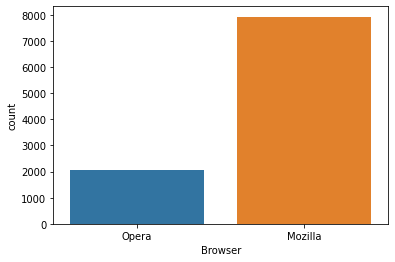

In [47]:
sns.countplot(data=data , x="Browser")

In [48]:
data.drop("temp", axis=1 , inplace=True)

In [49]:
data.head()

,AM or PM,Credit Card,CC Security Code,CC Provider,IP Address,Language,Purchase Price,CC Exp Month,CC Exp Year,Browser,new_lot
0,PM,6011929061123406,900,JCB,149.146.147.205,el,98.14,02,20,Opera,46
1,PM,3337758169645356,561,Mastercard,15.160.41.51,fr,70.73,11,18,Opera,28
2,PM,675957666125,699,JCB,132.207.160.22,de,0.95,08,19,Mozilla,94
3,PM,6011578504430710,384,Discover,30.250.74.19,es,78.04,02,24,Mozilla,36
4,AM,6011456623207998,678,Diners,24.140.33.94,es,77.82,10,25,Opera,20


In [50]:
le = LabelEncoder()

In [51]:
data["AM or PM"] = le.fit_transform(data["AM or PM"])
data["CC Provider"] = le.fit_transform(data["CC Provider"])
data["Language"] = le.fit_transform(data["Language"])
data["Browser"] = le.fit_transform(data["Browser"])

In [52]:
data.head(5)

,AM or PM,Credit Card,CC Security Code,CC Provider,IP Address,Language,Purchase Price,CC Exp Month,CC Exp Year,Browser,new_lot
0,1,6011929061123406,900,3,149.146.147.205,1,98.14,02,20,1,46
1,1,3337758169645356,561,5,15.160.41.51,4,70.73,11,18,1,28
2,1,675957666125,699,3,132.207.160.22,0,0.95,08,19,0,94
3,1,6011578504430710,384,2,30.250.74.19,3,78.04,02,24,0,36
4,0,6011456623207998,678,1,24.140.33.94,3,77.82,10,25,1,20


## Now our data is ready for model building